<a href="https://colab.research.google.com/github/belkisKOS/ai_model/blob/main/cnn1_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# Set up data augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# Load data using ImageDataGenerator for train, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)




# Set up data generators for training, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set paths to your dataset
train_dir = '/content/drive/My Drive/Atelier2025_SCI_1st_Dataset/processed_dataset2/train'  # Update this path
val_dir = '/content/drive/My Drive/Atelier2025_SCI_1st_Dataset/processed_dataset2/val'      # Update this path
test_dir = '/content/drive/My Drive/Atelier2025_SCI_1st_Dataset/processed_dataset2/test'   # Update this path

# Set up the train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (Normal vs Pneumonia)
    classes=['Normal', 'Pneumonia']  # Only include Normal and Pneumonia
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (Normal vs Pneumonia)
    classes=['Normal', 'Pneumonia']  # Only include Normal and Pneumonia
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (Normal vs Pneumonia)
    classes=['Normal', 'Pneumonia']  # Only include Normal and Pneumonia
)


Found 17952 images belonging to 2 classes.
Found 5863 images belonging to 2 classes.
Found 3017 images belonging to 2 classes.


In [ ]:
# Define the CNN model for binary classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Callbacks for early stopping, learning rate reduction, and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler, checkpoint],
    class_weight={0: 1., 1: 2.5},  # Adjust class weights due to class imbalance
    verbose=1  # Show detailed progress during training (accuracy, loss, etc.)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9316 - loss: 0.2736

561/561 ━━━━━━━━━━━━━━━━━━━━ 4064s 7s/step - accuracy: 0.9316 - loss: 0.2734 - val_accuracy: 0.9650 - val_loss: 0.0833 - learning_rate: 1.0000e-04
Epoch 2/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2183s 4s/step - accuracy: 0.9811 - loss: 0.0718 - val_accuracy: 0.9632 - val_loss: 0.1036 - learning_rate: 1.0000e-04
Epoch 3/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9842 - loss: 0.0558

561/561 ━━━━━━━━━━━━━━━━━━━━ 2122s 4s/step - accuracy: 0.9842 - loss: 0.0558 - val_accuracy: 0.9882 - val_loss: 0.0318 - learning_rate: 1.0000e-04
Epoch 4/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2120s 4s/step - accuracy: 0.9908 - loss: 0.0373 - val_accuracy: 0.9819 - val_loss: 0.0668 - learning_rate: 1.0000e-04
Epoch 5/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2118s 4s/step - accuracy: 0.9933 - loss: 0.0237 - val_accuracy: 0.9875 - val_loss: 0.0381 - learning_rate: 1.0000e-04
Epoch 6/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2112s 4s/step - accuracy: 0.9941 - loss: 0.0217 - val_accuracy: 0.9911 - val_loss: 0.0322 - learning_rate: 1.0000e-04
Epoch 7/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9954 - loss: 0.0159

561/561 ━━━━━━━━━━━━━━━━━━━━ 2102s 4s/step - accuracy: 0.9954 - loss: 0.0159 - val_accuracy: 0.9939 - val_loss: 0.0195 - learning_rate: 5.0000e-05
Epoch 8/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2130s 4s/step - accuracy: 0.9976 - loss: 0.0105 - val_accuracy: 0.9937 - val_loss: 0.0229 - learning_rate: 5.0000e-05
Epoch 9/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2160s 4s/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9932 - val_loss: 0.0243 - learning_rate: 5.0000e-05
Epoch 10/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2130s 4s/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 0.9937 - val_loss: 0.0243 - learning_rate: 5.0000e-05
Epoch 11/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2137s 4s/step - accuracy: 0.9995 - loss: 0.0033 - val_accuracy: 0.9916 - val_loss: 0.0362 - learning_rate: 2.5000e-05
Epoch 12/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 2101s 4s/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9933 - val_loss: 0.0308 - learning_rate: 2.5000e-05


In [ ]:
# Print accuracy and validation accuracy on training data
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Training Accuracy: ", train_acc[-1])
print("Validation Accuracy: ", val_acc[-1])


Training Accuracy:  0.9992201328277588
Validation Accuracy:  0.9933481216430664


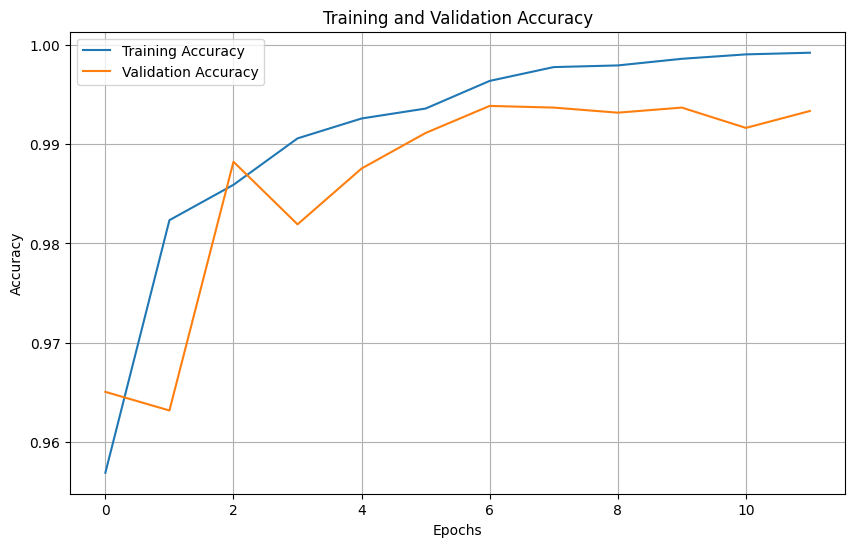

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)


95/95 ━━━━━━━━━━━━━━━━━━━━ 656s 7s/step - accuracy: 0.9944 - loss: 0.0152
Test Accuracy:  0.9930394291877747
Test Loss:  0.019871098920702934


95/95 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step


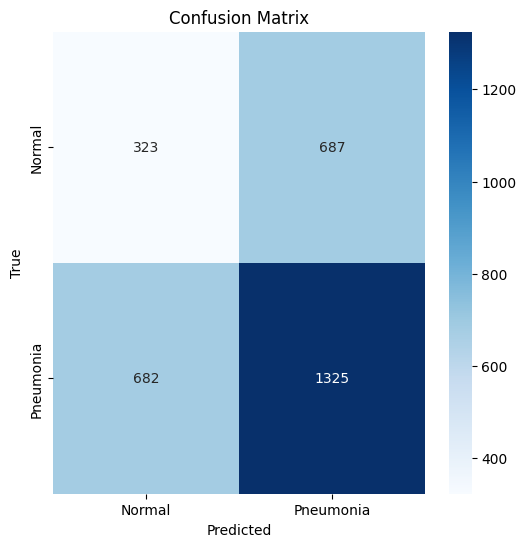

Confusion Matrix: 
 [[ 323  687]
 [ 682 1325]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get the true labels and predicted labels
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print confusion matrix for clarity
print("Confusion Matrix: \n", cm)


In [ ]:
import os

# Define the save path where you want to save the model
save_path = '/content/drive/My Drive/Atelier2025_SCI_1st_Dataset/binary_cnn'

# Create the directory if it does not exist
os.makedirs(save_path, exist_ok=True)

# Define the full path for the model to be saved
model_save_path = os.path.join(save_path, 'binary_cnn_model.h5')

# Save the model
model.save(model_save_path)

print(f"Model saved successfully at {model_save_path}")


Model saved successfully at /content/drive/My Drive/Atelier2025_SCI_1st_Dataset/binary_cnn/binary_cnn_model.h5
